In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [2]:
#import labelled data
df = pd.read_csv("data-performance.csv")
#show data summary
#print(df.shape)
#print(df.head())
display(df.describe())
display(df.describe(include = 'object'))

#gender-code using 0 (male) and 1 (female)
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
#extract class labels from dataframe
class_label = df.iloc[:,-1].to_numpy()
df_features = df.iloc[:,:-1]
#print(class_label)
#print(df_features.shape)

#check for missing values
missing_values_count = df.isnull().sum()
#print(missing_values_count)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.065300,168.790510,68.255130,23.898855,79.031270,130.418290,36.558095,13.641773,37.807200,187.144200
std,13.702759,8.552227,12.215114,7.341047,10.788006,14.715057,10.546037,8.552370,14.447798,40.206157
min,21.000000,125.000000,26.300000,3.500000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.600000,59.000000,18.600000,72.000000,120.000000,27.100000,9.000000,28.000000,160.000000
50%,33.000000,169.600000,68.200000,23.400000,79.000000,130.000000,37.700000,14.600000,39.000000,191.000000
75%,48.000000,175.000000,76.200000,28.800000,87.000000,141.000000,44.500000,19.300000,49.000000,218.000000
max,64.000000,193.800000,138.100000,54.900000,156.200000,195.000000,70.500000,213.000000,80.000000,303.000000


,gender,class
count,10000,10000
unique,2,4
top,M,D
freq,6484,3294


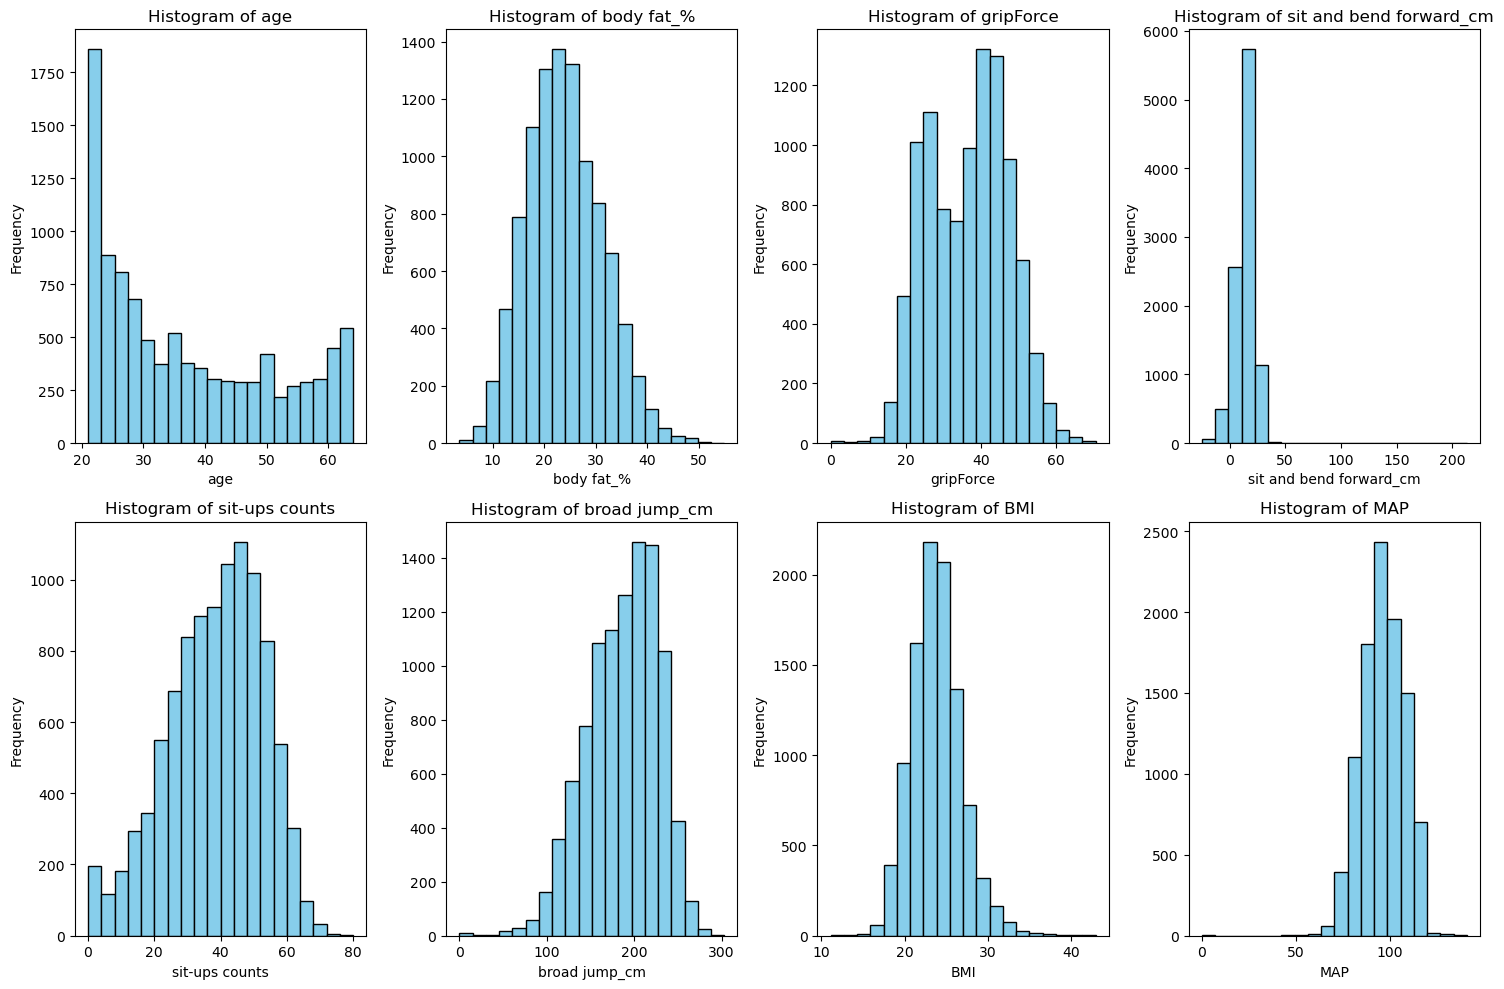

In [3]:
#add more summarative features
df_features['BMI'] = df_features['weight_kg'] / (df_features['height_cm']/100) ** 2
df_features['pulse_pressure'] = df_features['systolic'] - df_features['diastolic']
df_features['MAP'] = (df_features['systolic'] + 2 * df_features['diastolic']) / 3
df_features.head()
# #binning features into categories can help capture nonlinear effects
# df['age_group'] = pd.cut(df['age'], bins=[0, 18, 65, 100], labels=['Youth', 'Adult', 'Senior'])
# df['body_fat_category'] = pd.cut(df['body fat_%'], bins=[0, 18, 25, 50], labels=['Low', 'Normal', 'High'])

# histogram the four continuous variables
features = ['age', 'body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'BMI', 'MAP']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()
for ax, feature in zip(axes, features):
    ax.hist(df_features[feature], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

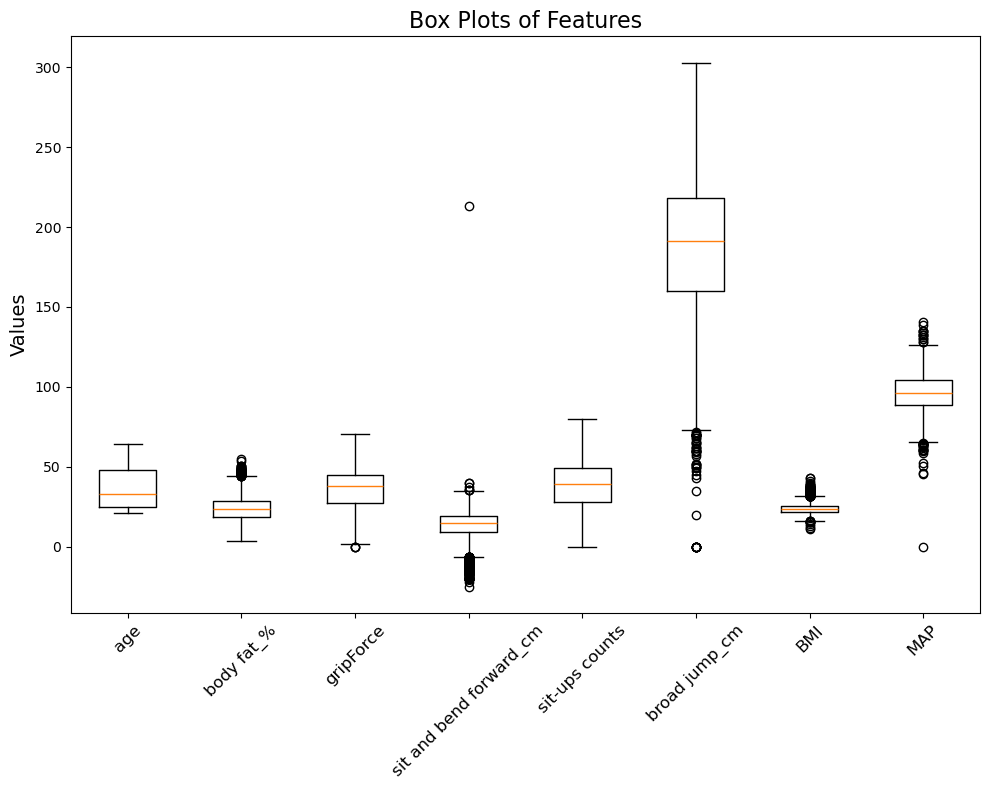

In [4]:
# box plots
fig, ax = plt.subplots(figsize=(10, 8))
data_to_plot = [df_features[feature].dropna() for feature in features]
bp = ax.boxplot(data_to_plot)
ax.set_xticks(range(1, len(features) + 1))
ax.set_xticklabels(features, rotation=45, fontsize=12)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Box Plots of Features', fontsize=16)
plt.tight_layout()
plt.show()

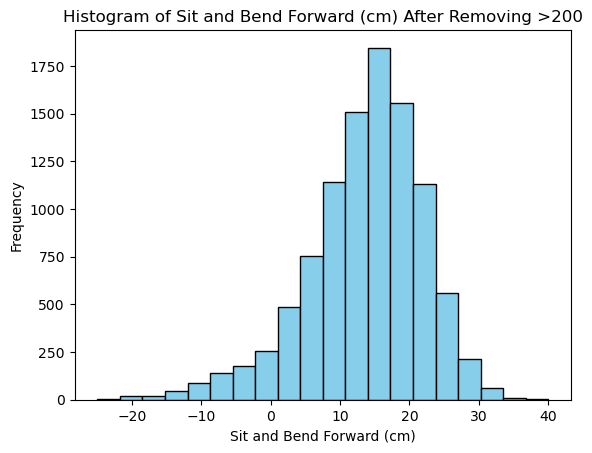

In [27]:
df_features['class_label'] = class_label
df_features_filtered = df_features[df_features['sit and bend forward_cm'] <= 200]

# Create a histogram of the 'sit and bend forward_cm' feature from the filtered DataFrame
plt.hist(df_features_filtered['sit and bend forward_cm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sit and Bend Forward (cm) After Removing >200')
plt.xlabel('Sit and Bend Forward (cm)')
plt.ylabel('Frequency')
plt.show()


/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/2798948368.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_filtered['class_label'] = df_features_filtered['class_label'].map(label_mapping)


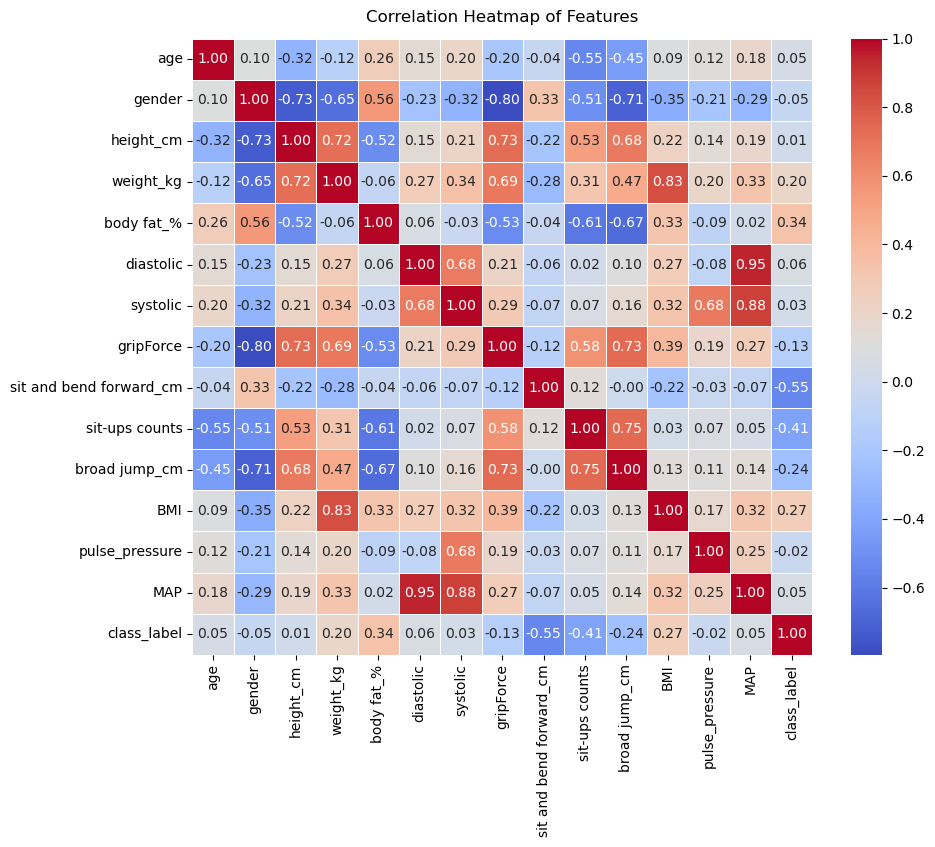

In [29]:
# pair plot
#df_features['class_label'] = class_label
# pair_plot = sb.pairplot(df_features, vars=features, hue='class_label', diag_kind='kde', palette='bright')

# correlation heatmap
label_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
df_features_filtered['class_label'] = df_features_filtered['class_label'].map(label_mapping)
corr_matrix = df_features_filtered.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sb.heatmap(corr_matrix, annot=True, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap.set_title('Correlation Heatmap of Features', fontdict={'fontsize': 12}, pad=12)
plt.show()

/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/1299227295.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/1299227295.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/1299227295.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/1299227295.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.kdeplo

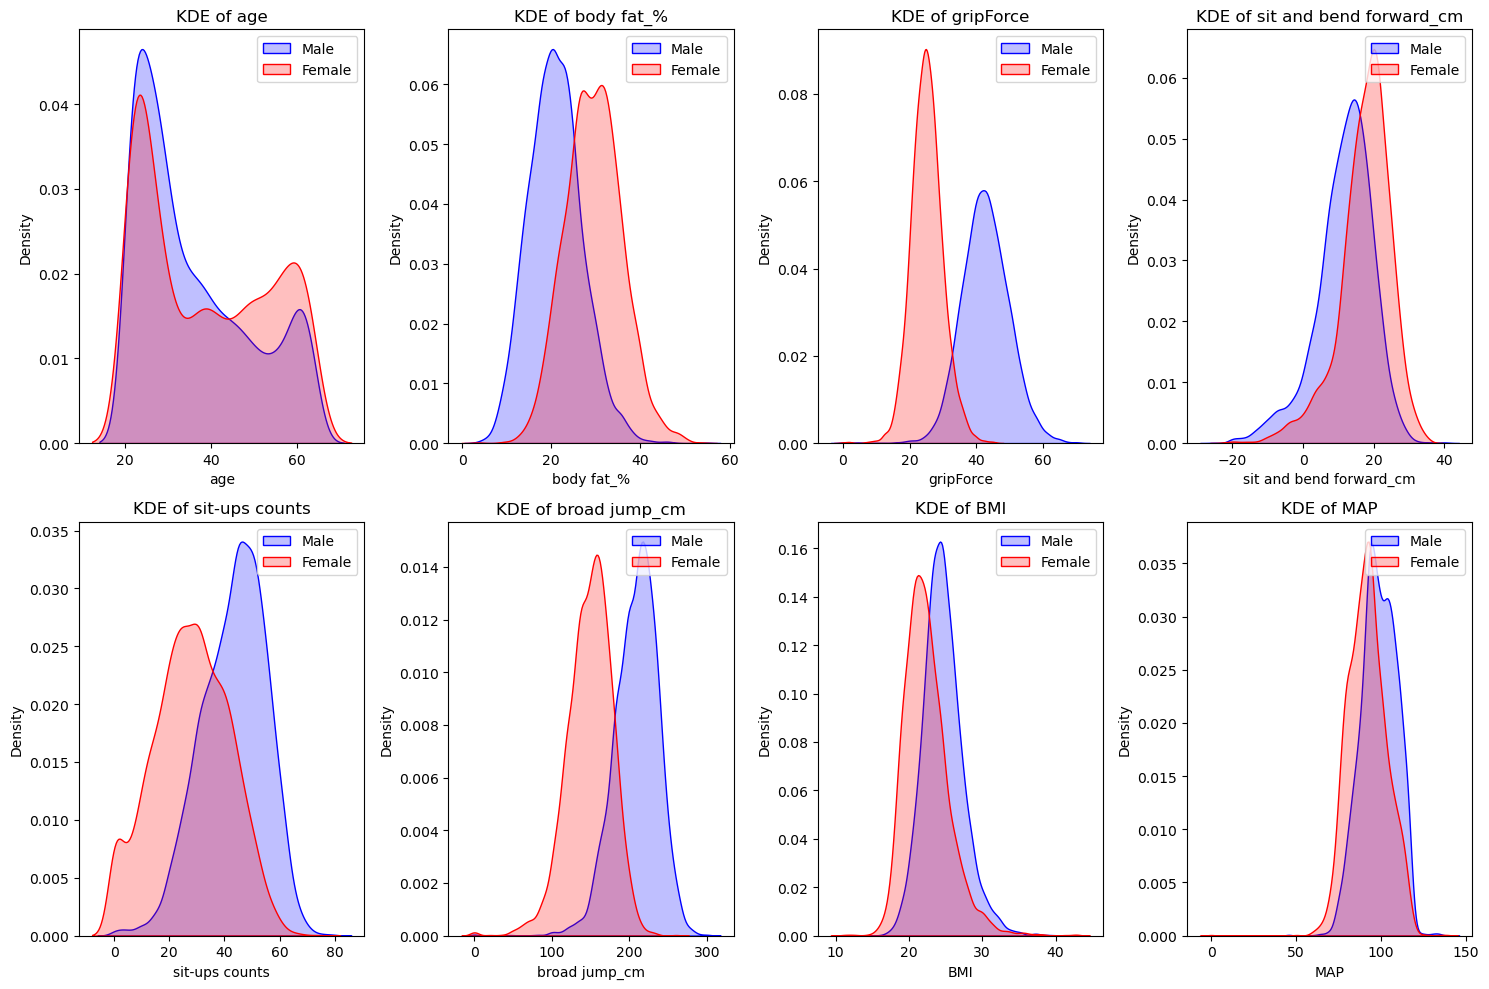

In [33]:
#after plotting the correlation heatmap, first thing I notcie is gender negatively correlates with most features,
# This means I should examine feature correlations separated by gender.
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()
for ax, feature in zip(axes, features):
    sb.kdeplot(df_features_filtered[df_features_filtered['gender'] == 0][feature], ax=ax, color='blue', label='Male', fill=True)
    sb.kdeplot(df_features_filtered[df_features['gender'] == 1][feature], ax=ax, color='red', label='Female', fill=True)
    ax.set_title(f'KDE of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()
plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import ttest_ind
male_df = df_features_filtered[df_features_filtered['gender'] == 0]
female_df = df_features_filtered[df_features_filtered['gender'] == 1]
results = []

# Loop through each column in the DataFrame
for column in df_features_filtered.columns:
    if df_features_filtered[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        # Perform t-test
        t_stat, p_value = ttest_ind(male_df[column].dropna(), female_df[column].dropna(), equal_var=False)  # Welch's t-test

        # Append the results
        results.append({'Feature': column,
                        'T-Statistic': t_stat,
                        'P-Value': p_value})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
display(results_df)

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Feature,T-Statistic,P-Value
0,age,-9.387587,8.263266e-21
1,gender,-inf,0.000000e+00
2,height_cm,107.425531,0.000000e+00
3,weight_kg,90.913614,0.000000e+00
4,body fat_%,-65.877719,0.000000e+00
5,diastolic,23.262152,2.463378e-115
6,systolic,33.178241,1.470218e-223
7,gripForce,147.581978,0.000000e+00
8,sit and bend forward_cm,-35.525415,3.564265e-256
9,sit-ups counts,56.453328,0.000000e+00


In [9]:
# try normalizing or standardizing features within each gender group separately, could this reduce the bimodality?
# from sklearn.preprocessing import StandardScaler
# male_df = df_features[df_features['gender'] == 0]
# female_df = df_features[df_features['gender'] == 1]
# scaler = StandardScaler()
# features_to_scale = ['age', 'body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'BMI', 'MAP']
# male_df.loc[:, features_to_scale] = scaler.fit_transform(male_df[features_to_scale])
# female_df.loc[:, features_to_scale] = scaler.fit_transform(female_df[features_to_scale])
# combined_df = pd.concat([male_df, female_df])

# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
# axes = axes.flatten()
# combined_df['class_label'] = class_label
# for ax, feature in zip(axes, features):
#     sb.kdeplot(combined_df[combined_df['gender'] == 0], x=feature, ax=ax, color='blue', label='Male', fill=True, hue="class_label")
#     sb.kdeplot(combined_df[combined_df['gender'] == 1], x=feature, ax=ax, color='red', label='Female', fill=True, hue="class_label")
#     ax.set_title(f'KDE of {feature}')
#     ax.set_xlabel(feature)
#     ax.set_ylabel('Density')
#     ax.legend()
# plt.tight_layout()
# plt.show()

In [10]:
# Quantile-based binning into quartiles
# combined_df['age_quartile'] = pd.qcut(combined_df['age'], 4, labels=False)
#print(combined_df['age_quartile'].value_counts())

# for group in combined_df['age_quartile'].unique():
#     group_indices = combined_df['age_quartile'] == group
#     combined_df.loc[group_indices, features_to_scale] = scaler.fit_transform(combined_df.loc[group_indices, features_to_scale])
# display(combined_df)

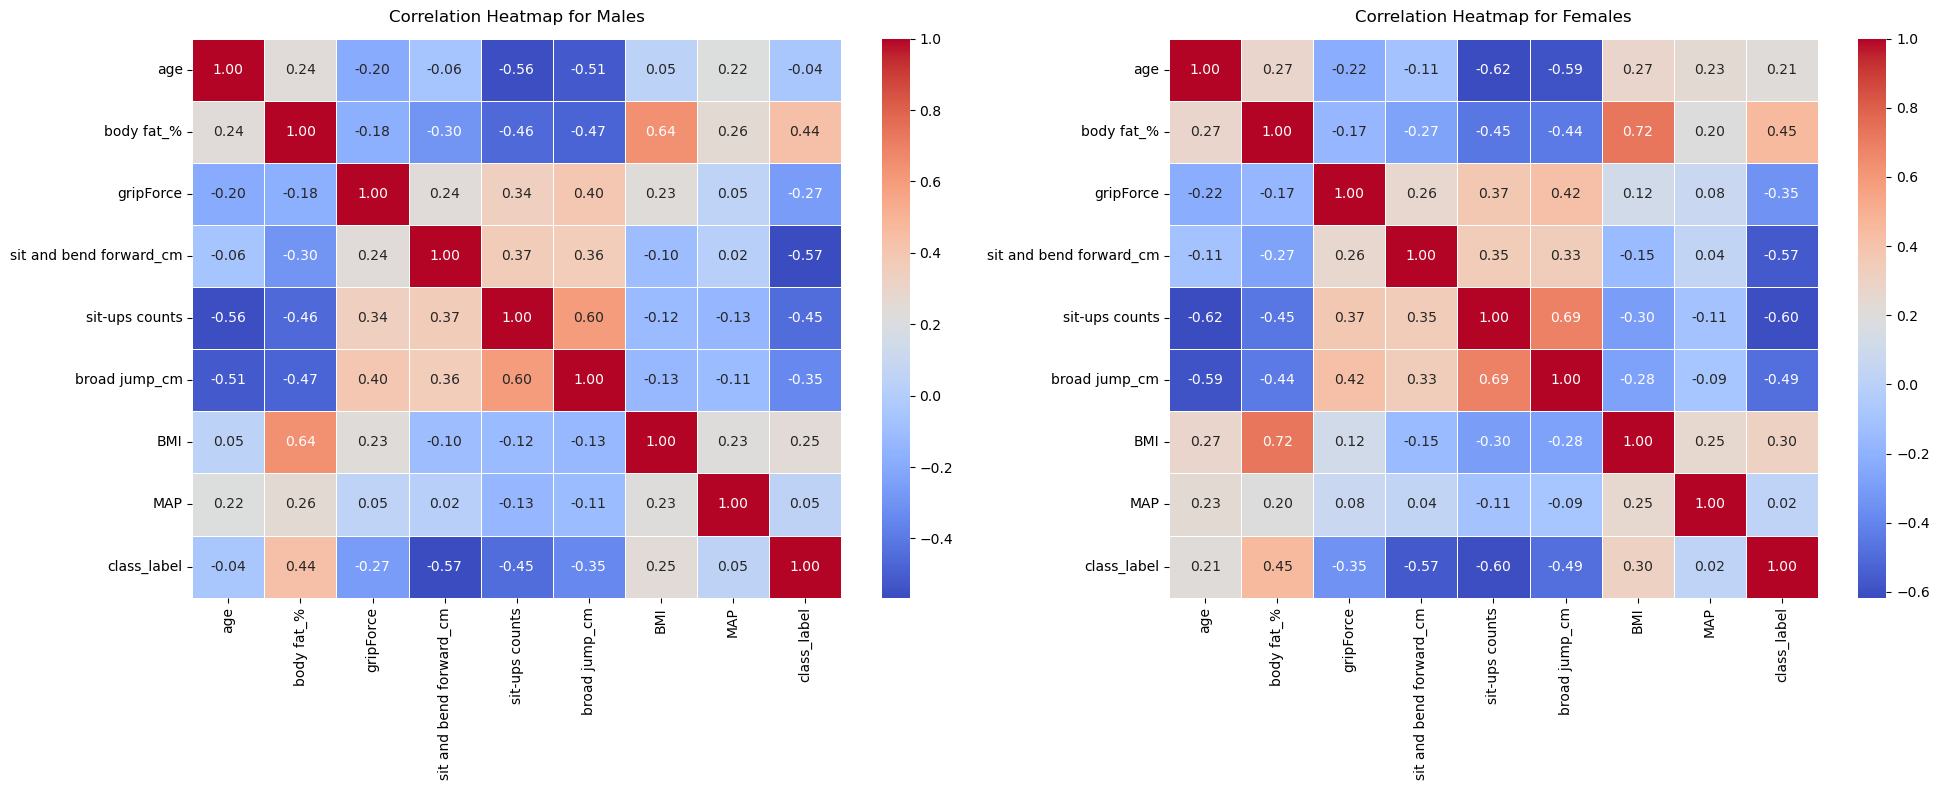

In [37]:
# correlation heatmap
features = ['age', 'body fat_%', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm', 'BMI', 'MAP', 'class_label']
male_df = df_features_filtered[df_features_filtered['gender'] == 0]
female_df = df_features_filtered[df_features_filtered['gender'] == 1]
corr_matrix_male = male_df[features].corr()
corr_matrix_female = female_df[features].corr()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
# Heatmap for males
heatmap_male = sb.heatmap(corr_matrix_male, annot=True, ax=axes[0], cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap_male.set_title('Correlation Heatmap for Males', fontdict={'fontsize': 12}, pad=12)

# Heatmap for females
heatmap_female = sb.heatmap(corr_matrix_female, annot=True, ax=axes[1], cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap_female.set_title('Correlation Heatmap for Females', fontdict={'fontsize': 12}, pad=12)

# Display the plots
plt.tight_layout()
plt.show()

/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/4222878789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_filtered[feature + '_normalized'] = df_features_filtered.groupby('gender')[feature].transform(


Feature: gripForce
Correlation before normalization: -0.1313115185784013
Correlation after normalization: -0.2953854105828257


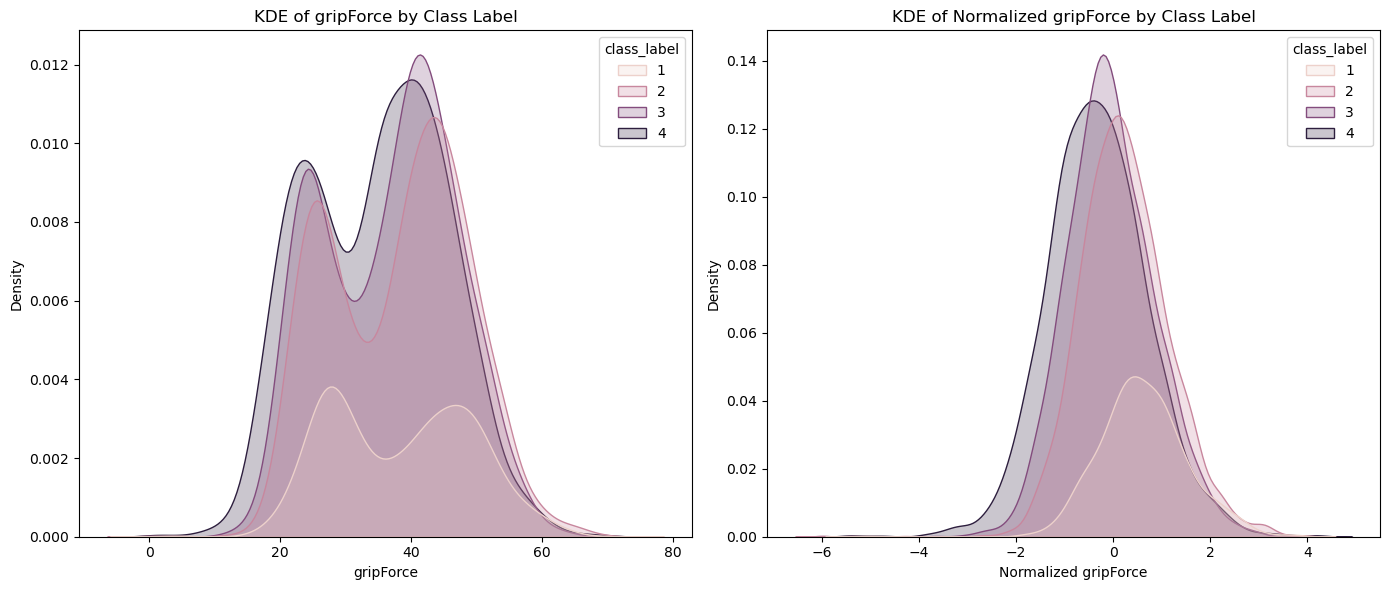

/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/4222878789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_filtered[feature + '_normalized'] = df_features_filtered.groupby('gender')[feature].transform(


Feature: sit and bend forward_cm
Correlation before normalization: -0.5489277612338038
Correlation after normalization: -0.564956175919815


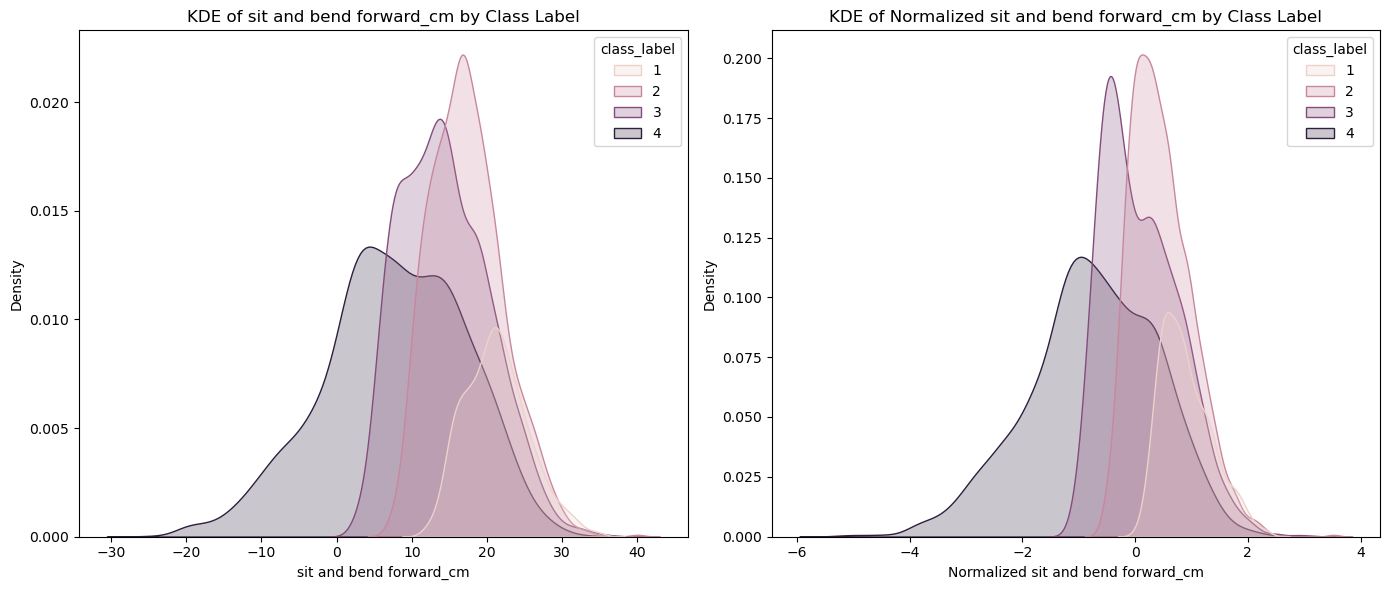

/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/4222878789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_filtered[feature + '_normalized'] = df_features_filtered.groupby('gender')[feature].transform(


Feature: sit-ups counts
Correlation before normalization: -0.41435578688415503
Correlation after normalization: -0.5051760046097177


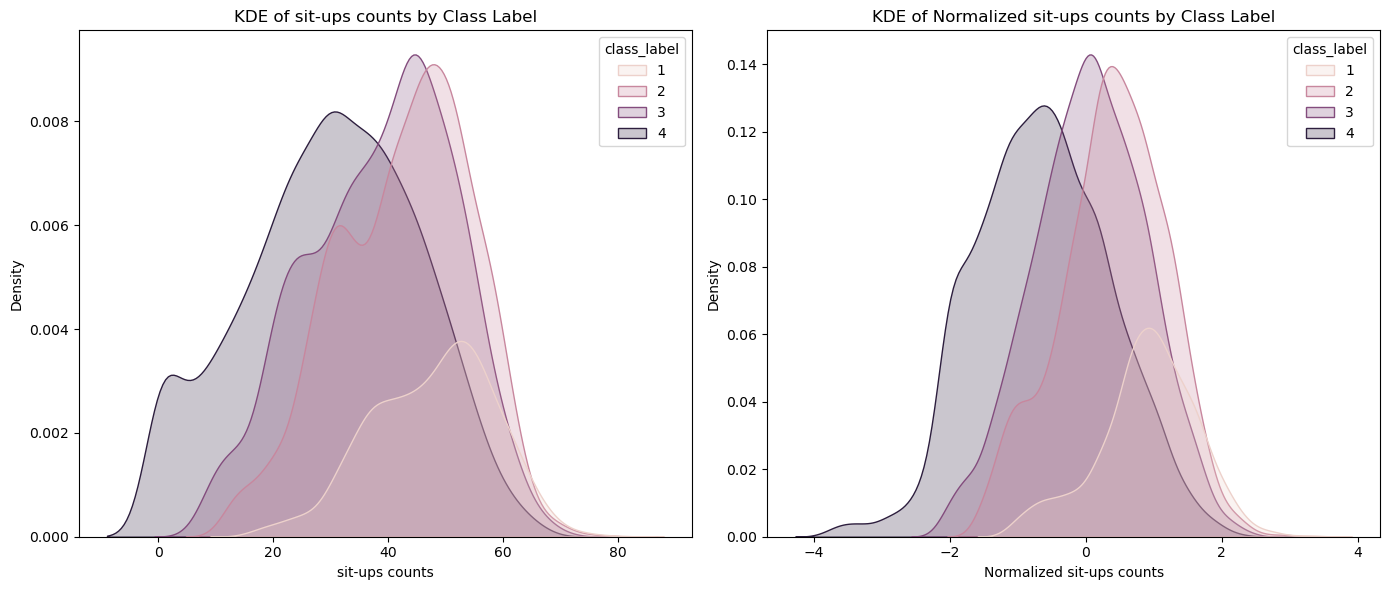

/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/4222878789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_filtered[feature + '_normalized'] = df_features_filtered.groupby('gender')[feature].transform(


Feature: broad jump_cm
Correlation before normalization: -0.24491874699830163
Correlation after normalization: -0.39712098804742385


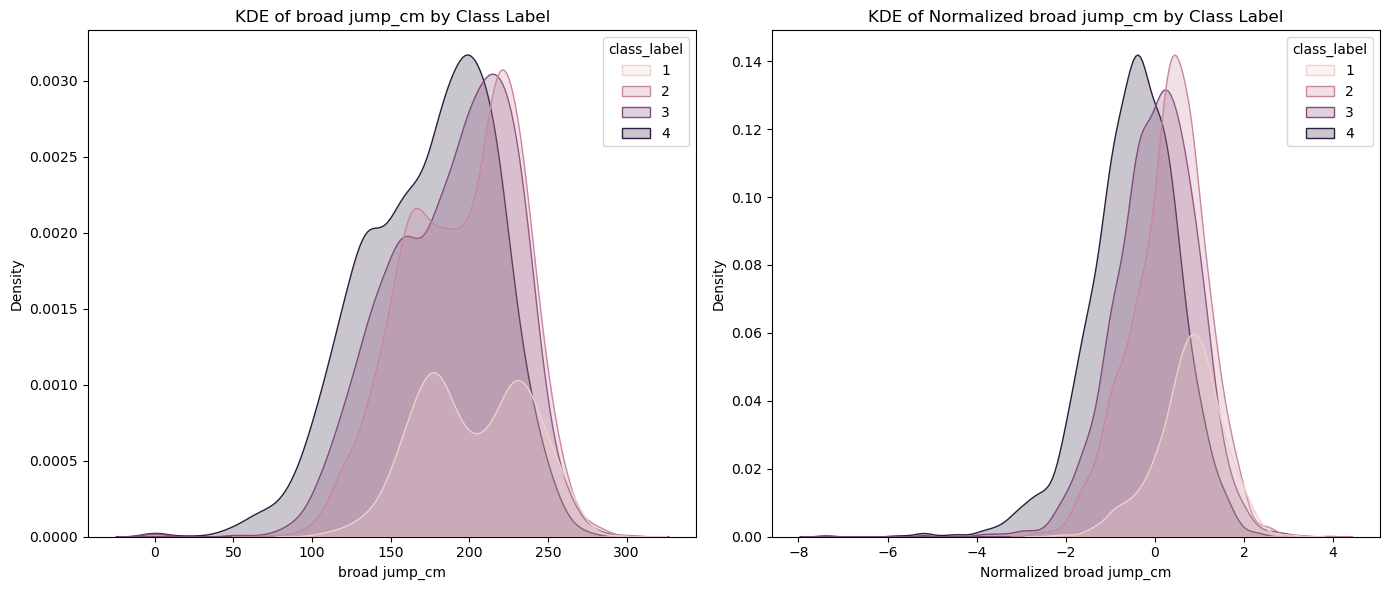

In [72]:
from scipy.stats import pearsonr
features = ['gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']

for feature in features:
    # Calculate the Pearson correlation before normalization
    cor_before = pearsonr(df_features_filtered[feature], df_features_filtered['class_label'])[0]

    # Normalize the feature within each gender group
    df_features_filtered[feature + '_normalized'] = df_features_filtered.groupby('gender')[feature].transform(
        lambda x: (x - x.mean()) / x.std())

    # Calculate the Pearson correlation after normalization
    cor_after = pearsonr(df_features_filtered[feature + '_normalized'], df_features_filtered['class_label'])[0]

    # Output the correlation results
    print(f"Feature: {feature}")
    print(f"Correlation before normalization: {cor_before}")
    print(f"Correlation after normalization: {cor_after}")

    # Setup figure and axes for the KDE plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # Original feature KDE plot
    sb.kdeplot(data=df_features_filtered, x=feature, hue='class_label', ax=axes[0], fill=True)
    axes[0].set_title(f'KDE of {feature} by Class Label')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Density')

    # Normalized feature KDE plot
    sb.kdeplot(data=df_features_filtered, x=feature + '_normalized', hue='class_label', ax=axes[1], fill=True)
    axes[1].set_title(f'KDE of Normalized {feature} by Class Label')
    axes[1].set_xlabel('Normalized ' + feature)
    axes[1].set_ylabel('Density')

    # Display the plot
    plt.tight_layout()
    plt.show()

/var/folders/vc/tgg_g5lj54j8ty34m_yl2b7m0000gn/T/ipykernel_28417/4078567345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_filtered['BMI_BodyFat_Interaction'] = df_features_filtered['BMI'] * df_features_filtered['body fat_%']


Correlation of BMI with class label: 0.2685012864286229
Correlation of BMI with class label: 0.338766850843347
Correlation of BMI_BodyFat_Interaction with class label: 0.38110978958684916


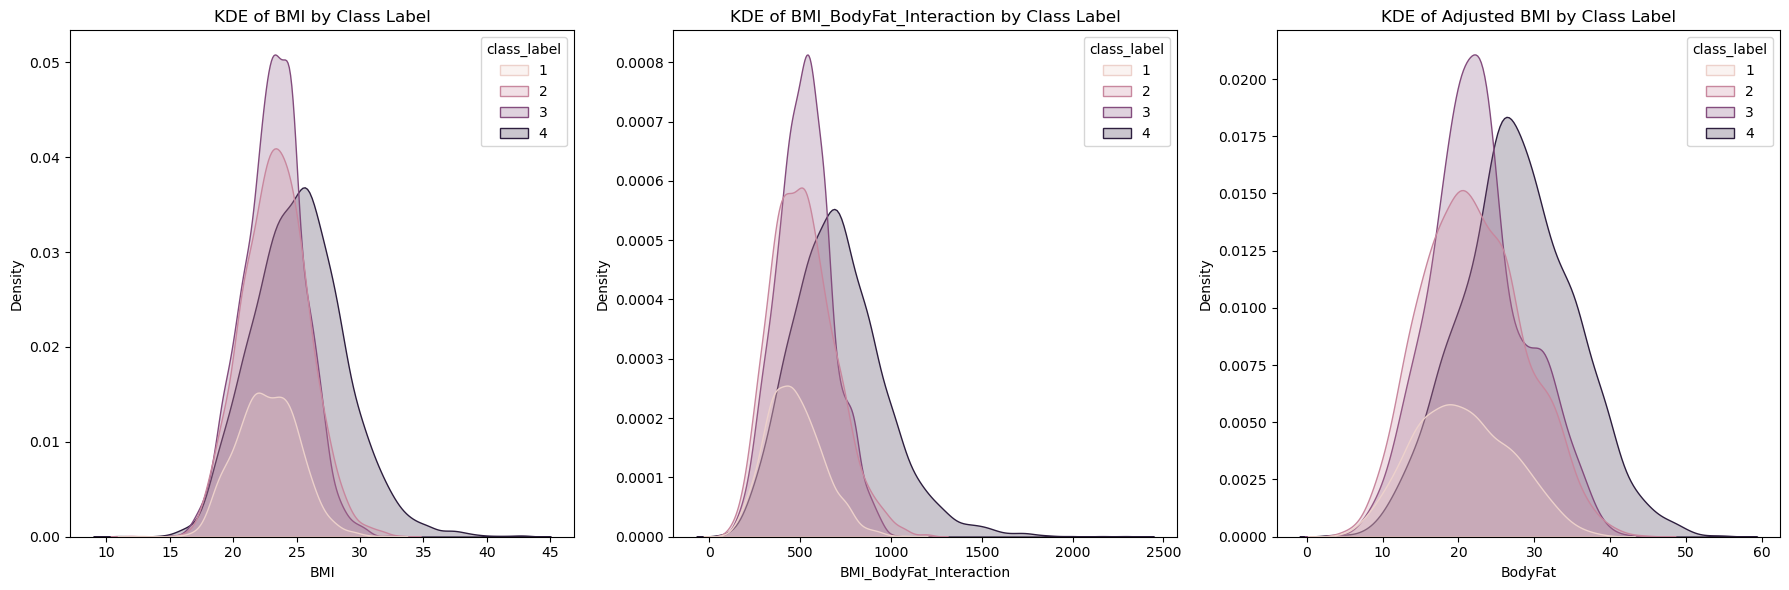

In [90]:
df_features_filtered['BMI_BodyFat_Interaction'] = df_features_filtered['BMI'] * df_features_filtered['body fat_%']

cor_BMI = pearsonr(df_features_filtered['BMI'], df_features_filtered['class_label'])[0]
cor_BodyFat = pearsonr(df_features_filtered['body fat_%'], df_features_filtered['class_label'])[0]
cor_BMI_BodyFat_Interaction = pearsonr(df_features_filtered['BMI_BodyFat_Interaction'], df_features_filtered['class_label'])[0]

print(f"Correlation of BMI with class label: {cor_BMI}")
print(f"Correlation of BMI with class label: {cor_BodyFat}")
print(f"Correlation of BMI_BodyFat_Interaction with class label: {cor_BMI_BodyFat_Interaction}")


# Setup figure for KDE plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# KDE plot for original BMI
sb.kdeplot(data=df_features_filtered, x='BMI', hue='class_label', ax=axes[0], fill=True)
axes[0].set_title('KDE of BMI by Class Label')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Density')

# KDE plot for BMI_BodyFat_Interaction
sb.kdeplot(data=df_features_filtered, x='BMI_BodyFat_Interaction', hue='class_label', ax=axes[1], fill=True)
axes[1].set_title('KDE of BMI_BodyFat_Interaction by Class Label')
axes[1].set_xlabel('BMI_BodyFat_Interaction')
axes[1].set_ylabel('Density')

# KDE plot for Adjusted BMI
sb.kdeplot(data=df_features_filtered, x='body fat_%', hue='class_label', ax=axes[2], fill=True)
axes[2].set_title('KDE of Adjusted BMI by Class Label')
axes[2].set_xlabel('BodyFat')
axes[2].set_ylabel('Density')

# Display the plot
plt.tight_layout()
plt.show()

In [202]:
selected_features = [
    "gender",
    "age",
    'gripForce',
    'sit-ups counts',
    'sit and bend forward_cm',
    'broad jump_cm',
    'body fat_%',
    "BMI",
    "MAP",
    "class_label"
]
df_selected = df_features_filtered[selected_features]
df_selected

,gender,age,gripForce,sit-ups counts,sit and bend forward_cm,broad jump_cm,body fat_%,BMI,MAP,class_label
0,1,61.0,25.6,23.0,22.0,130.0,23.6,21.054927,94.000000,1
1,1,56.0,24.9,22.0,17.0,132.0,32.0,23.391803,102.000000,2
2,1,40.0,24.0,32.0,19.8,167.0,30.0,23.467348,97.333333,4
3,1,59.0,25.2,23.0,21.2,135.0,29.5,21.824807,106.000000,2
4,0,45.0,38.0,35.0,-2.7,172.0,20.6,26.454950,98.000000,4
...,...,...,...,...,...,...,...,...,...,...
9995,1,36.0,30.6,46.0,12.0,191.0,28.0,21.921195,66.000000,3
9996,0,35.0,40.1,46.0,13.7,160.0,18.0,25.780664,107.000000,4
9997,0,32.0,47.1,19.0,5.4,210.0,18.0,23.794816,95.666667,4
9998,0,45.0,35.7,33.0,-10.7,201.0,26.1,29.587069,94.666667,4


In [204]:
X = df_selected.iloc[:,0:9].to_numpy()
y = df_selected.iloc[:,-1].to_numpy()
print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)


(9999, 9)
(9999,)


In [230]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# code adapted from https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ('std_slc', StandardScaler()),
    ('logistic_Reg', LogisticRegression(max_iter=10000))
])

C = np.logspace(-4, 4, 50)  # Regularization strength
penalty = ['l2']  # Types of penalties (Note: 'l1' requires 'saga' solver)

parameters = {
    'logistic_Reg__C': C,
    'logistic_Reg__penalty': penalty,
    'logistic_Reg__solver': ['lbfgs', 'saga', "newton-cg", "sag"]  # 'liblinear' and 'saga' support L1 penalty
}

clf_GS = GridSearchCV(pipe, parameters, cv=stratified_kfold)
clf_GS.fit(X, y)
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Solver:', clf_GS.best_estimator_.get_params()['logistic_Reg__solver'])
print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

# Calculate and print accuracy on the training and test sets
train_accuracy = clf_GS.best_estimator_.score(X_train, y_train)
test_accuracy = clf_GS.best_estimator_.score(X_test, y_test)
print("Accuracy on training set: {:.3f}".format(train_accuracy))
print("Accuracy on test set: {:.3f}".format(test_accuracy))

Best Penalty: l2
Best C: 11.513953993264458
Best Solver: lbfgs
LogisticRegression(C=11.513953993264458, max_iter=10000)
Accuracy on training set: 0.602
Accuracy on test set: 0.614


In [232]:
from sklearn.metrics import classification_report, confusion_matrix 
predictions = clf_GS.predict(X_test) 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           1       0.60      0.40      0.48       254
           2       0.49      0.54      0.52       673
           3       0.54      0.56      0.55       749
           4       0.80      0.79      0.79       824

    accuracy                           0.61      2500
   macro avg       0.61      0.57      0.58      2500
weighted avg       0.62      0.61      0.61      2500



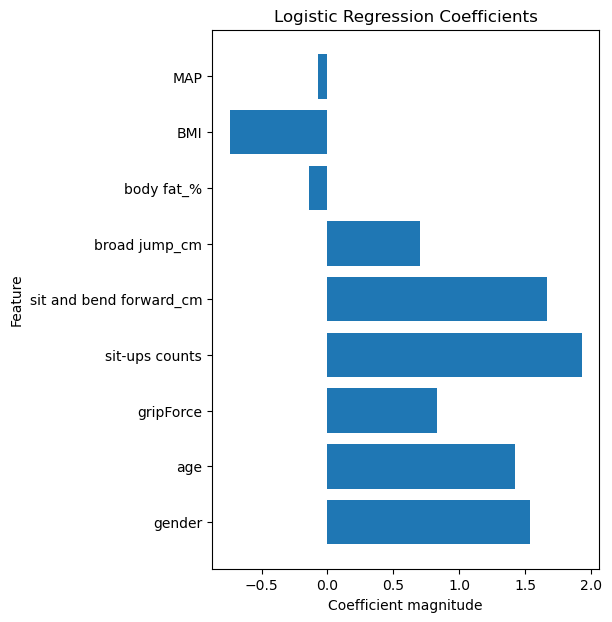

In [238]:
feature_names = df_selected.columns[:9]
best_model = clf_GS.best_estimator_.named_steps['logistic_Reg']
def plot_logistic_coefficients(model, feature_names):
    """
    Plots the coefficients from a logistic regression model.
    
    Parameters:
    - model: The logistic regression model.
    - feature_names: A list of feature names corresponding to the model coefficients.
    """
    n_features = model.coef_.shape[1]
    plt.figure(figsize=(5, 7))
    plt.barh(range(n_features), model.coef_[0], align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient magnitude")
    plt.ylabel("Feature")
    plt.title("Logistic Regression Coefficients")
    plt.show()

# Assuming best_model is your fitted Logistic Regression model
# and feature_names contains the corresponding feature names
plot_logistic_coefficients(best_model, feature_names)


In [240]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
grid.fit(X_train, y_train) 
print(grid.best_params_) 
print(grid.best_estimator_) 
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.329 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.329 total time=   1.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.329 total time=   1.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.329 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.330 total time=   1.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.329 total time=   1.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.329 total time=   1.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.329 total time=   1.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.329 total time=   1.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.330 total time=   1.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.425 total time=   1.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [246]:
pipe = Pipeline([
    ('std_slc', StandardScaler()),
    ('random_forest', RandomForestClassifier(random_state=42))
])
parameters = {
    'random_forest__n_estimators': [250, 300, 350],
    'random_forest__max_features': ['sqrt', 'log2'],
    'random_forest__max_depth': [15, 20, 25],
    'random_forest__min_samples_split': [2, 5, 7],
    'random_forest__min_samples_leaf': [1, 2, 3]
}
clf_GS = GridSearchCV(pipe, parameters, cv=stratified_kfold, scoring='accuracy', verbose=3)
clf_GS.fit(X_train, y_train)

# Output the best parameters and estimator
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['random_forest__n_estimators'])
print('Best max_features:', clf_GS.best_estimator_.get_params()['random_forest__max_features'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['random_forest__max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['random_forest__min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['random_forest__min_samples_leaf'])
print(clf_GS.best_estimator_.get_params()['random_forest'])

# Calculate accuracy on the training set
train_accuracy = clf_GS.best_estimator_.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(train_accuracy))

# Calculate accuracy on the test set
test_accuracy = clf_GS.best_estimator_.score(X_test, y_test)
print("Accuracy on test set: {:.3f}".format(test_accuracy))

grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END random_forest__max_depth=15, random_forest__max_features=auto, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=250;, score=nan total time=   0.0s
[CV 2/5] END random_forest__max_depth=15, random_forest__max_features=auto, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=250;, score=nan total time=   0.0s
[CV 3/5] END random_forest__max_depth=15, random_forest__max_features=auto, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=250;, score=nan total time=   0.0s
[CV 4/5] END random_forest__max_depth=15, random_forest__max_features=auto, random_forest__min_samples_leaf=1, random_forest__min_samples_split=2, random_forest__n_estimators=250;, score=nan total time=   0.0s
[CV 5/5] END random_forest__max_depth=15, random_forest__max_features=auto, random_forest__min_s

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estim

Best n_estimators: 350
Best max_features: sqrt
Best max_depth: 20
Best min_samples_split: 2
Best min_samples_leaf: 1
RandomForestClassifier(max_depth=20, n_estimators=350, random_state=42)
Accuracy on training set: 1.000
Accuracy on test set: 0.722
              precision    recall  f1-score   support

           1       0.55      0.56      0.55       254
           2       0.54      0.64      0.58       673
           3       0.65      0.62      0.64       749
           4       0.90      0.79      0.84       824

    accuracy                           0.68      2500
   macro avg       0.66      0.65      0.65      2500
weighted avg       0.69      0.68      0.68      2500



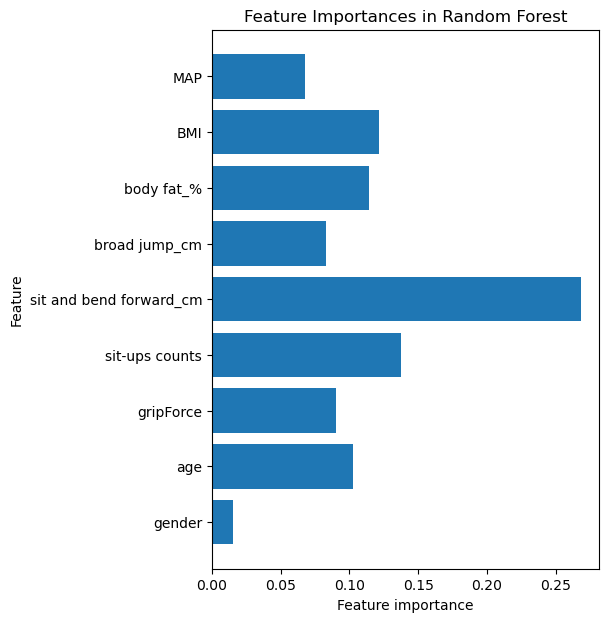

In [248]:
forest = clf_GS.best_estimator_.named_steps['random_forest']
def plot_feature_importances(model, feature_names):
    """
    Plots the feature importances of a Random Forest model.

    Parameters:
    - model: The Random Forest model.
    - feature_names: A list of feature names corresponding to the model's features.
    """
    n_features = model.feature_importances_.shape[0]
    plt.figure(figsize=(5, 7))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances in Random Forest")
    plt.show()

# Assuming 'feature_names' contains the names of features used in the model
feature_names = df_selected.columns[:9]  # Update accordingly if different
plot_feature_importances(forest, feature_names)

In [253]:
pipe = Pipeline([
    ('std_slc', StandardScaler()),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
])

parameters = {
    'gradient_boosting__n_estimators': [50, 100, 200, 300],
    'gradient_boosting__learning_rate': [0.01, 0.1, 0.2],
    'gradient_boosting__max_depth': [3, 5, 7],
    'gradient_boosting__min_samples_split': [2, 5],
    'gradient_boosting__min_samples_leaf': [1, 2],
    'gradient_boosting__max_features': ['sqrt', 'log2']
}

clf_GS = GridSearchCV(pipe, parameters, cv=stratified_kfold, scoring='accuracy', verbose=1)
clf_GS.fit(X_train, y_train)

# Output the best parameters and estimator
print('Best n_estimators:', clf_GS.best_estimator_.get_params()['gradient_boosting__n_estimators'])
print('Best learning_rate:', clf_GS.best_estimator_.get_params()['gradient_boosting__learning_rate'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['gradient_boosting__max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['gradient_boosting__min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['gradient_boosting__min_samples_leaf'])
print('Best max_features:', clf_GS.best_estimator_.get_params()['gradient_boosting__max_features'])

print(clf_GS.best_estimator_.get_params()['gradient_boosting'])

# Calculate accuracy on the training set
train_accuracy = clf_GS.best_estimator_.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(train_accuracy))

# Calculate accuracy on the test set
test_accuracy = clf_GS.best_estimator_.score(X_test, y_test)
print("Accuracy on test set: {:.3f}".format(test_accuracy))

grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: 

In [ ]:
gbrt = clf_GS.best_estimator_.named_steps['gradient_boosting']
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), var_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(gbrt)

In [ ]:
pipe = Pipeline([
    ('std_slc', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])
parameters = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization term
    'mlp__learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate
}

clf_GS = GridSearchCV(pipe, parameters, cv=stratified_kfold, scoring='accuracy', verbose=1)
clf_GS.fit(X_train, y_train)

# Output the best parameters and estimator
print('Best hidden_layer_sizes:', clf_GS.best_estimator_.get_params()['mlp__hidden_layer_sizes'])
print('Best activation:', clf_GS.best_estimator_.get_params()['mlp__activation'])
print('Best alpha:', clf_GS.best_estimator_.get_params()['mlp__alpha'])
print('Best learning_rate_init:', clf_GS.best_estimator_.get_params()['mlp__learning_rate_init'])
print()
print(clf_GS.best_estimator_.get_params()['mlp'])

# Calculate accuracy on the training set
train_accuracy = clf_GS.best_estimator_.score(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(train_accuracy))

# Calculate accuracy on the test set
test_accuracy = clf_GS.best_estimator_.score(X_test, y_test)
print("Accuracy on test set: {:.3f}".format(test_accuracy))

grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

mlp = clf_GS.best_estimator_.named_steps['mlp']

In [ ]:
plt.figure(figsize=(25, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), var_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar();

In [ ]:
best = "best"*10
print("here are more", best)

In [234]:
# from sklearn import preprocessing
# scalerX_train = preprocessing.StandardScaler().fit(X_train)
# X_train_s = scalerX_train.transform(X_train)

# scalerX_test = preprocessing.StandardScaler().fit(X_test)
# X_test_s = scalerX_test.transform(X_test)

# for name, classifier in classifiers.items():
#     classifier.fit(X_train, y_train)
#     print(f"{name}:")
#     print("Accuracy on training set: {:.3f}".format(classifier.score(X_train_s, y_train)))
#     print("Accuracy on test set: {:.3f}".format(classifier.score(X_test_s, y_test)))
#     print()